# 1, 2 задание

In [113]:
import pandas as pd

In [114]:
df = pd.read_csv('winequality-white.csv')
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 3 Задание

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import math

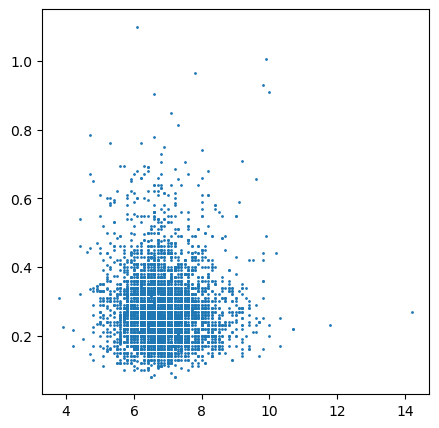

In [116]:
#pd.set_option('display.max_colums' , 2000)
#pd.set_option('display.width' , 2000)

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(df['FixedAcidity'], df['VolatileAcidity'], s = 1)
plt.show()

Строим предиктивный эллипс

In [117]:
x = df['Alcohol'] 
y = df['ResidualSugar']

In [118]:
def confidence_ellipse(x, y, ax, p_value, facecolor='none', **kwargs):
    
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    if p_value > 0 and p_value < 1:
        n_std = math.sqrt(-2 * math.log(p_value))
    else:
        print('P-value должно быть в интервале от 0 до 1')
    
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Значения ставим 0,1 0,05 0,01

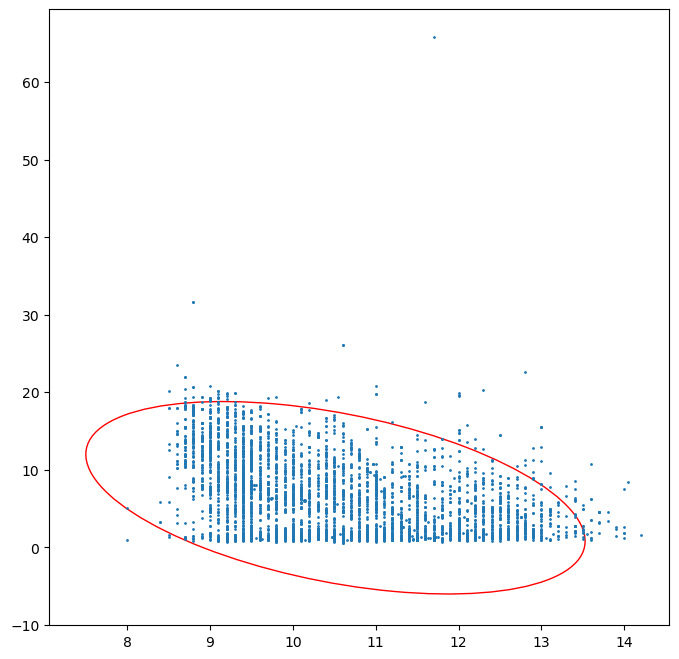

In [119]:
fig, ax = plt.subplots(figsize = (8, 8))
confidence_ellipse(x, y, ax, 0.05, edgecolor='red')
ax.scatter(x, y, s = 1)
plt.show()

# 4 Задание

Стандартизация данных

In [120]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [121]:
df1 = df.iloc[:, :-1]

scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
df1

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

# 5 Задание

Рассчет главных компонент

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 11)
df_train = pca.fit_transform(df1)

Матрица ковариаций

In [123]:
cov = pca.get_covariance()
print(cov)

[[ 1.00020421e+00 -2.27019251e-02  2.89239750e-01  8.90388800e-02
   2.30903579e-02 -4.94059460e-02  9.10883532e-02  2.65385196e-01
  -4.25945254e-01 -1.71464857e-02 -1.20905808e-01]
 [-2.27019251e-02  1.00020421e+00 -1.49502334e-01  6.42991877e-02
   7.05259704e-02 -9.70317498e-02  8.92787311e-02  2.71193823e-02
  -3.19218856e-02 -3.57354428e-02  6.77317712e-02]
 [ 2.89239750e-01 -1.49502334e-01  1.00020421e+00  9.42308629e-02
   1.14387802e-01  9.40964322e-02  1.21155533e-01  1.49533100e-01
  -1.63781650e-01  6.23436687e-02 -7.57441944e-02]
 [ 8.90388800e-02  6.42991877e-02  9.42308629e-02  1.00020421e+00
   8.87026459e-02  2.99159432e-01  4.01521288e-01  8.39137777e-01
  -1.94173097e-01 -2.66698109e-02 -4.50723244e-01]
 [ 2.30903579e-02  7.05259704e-02  1.14387802e-01  8.87026459e-02
   1.00020421e+00  1.01413057e-01  1.98950918e-01  2.57263845e-01
  -9.04579243e-02  1.67663068e-02 -3.60262265e-01]
 [-4.94059460e-02 -9.70317498e-02  9.40964322e-02  2.99159432e-01
   1.01413057e-01  

Матрица преобразования

In [124]:
[en, ev] = np.linalg.eig(cov)
print(en)

[3.2229119  0.0206533  1.57556161 0.28954625 0.41422824 1.22192081
 0.59948087 0.7267464  0.93893321 0.97353334 1.01873034]


Матрица преобразования другая

In [125]:
comp = pca.components_
explained_variance = pca.explained_variance_
print(explained_variance)
# print(comp)
# print(comp.T)

[3.2229119  1.57556161 1.22192081 1.01873034 0.97353334 0.93893321
 0.7267464  0.59948087 0.41422824 0.28954625 0.0206533 ]


# 6 Задание

Оценка информативности координат

In [126]:
#print(en)
en_sorted = sorted(en, reverse = True)
print(en_sorted)
en_r = en_sorted / en.sum()
print(en_r)

# explained_variance_ratio = pca.explained_variance_ratio_
# print(explained_variance_ratio_)

[3.2229118963275942, 1.5755616055612753, 1.221920813274392, 1.018730343715749, 0.9735333410659274, 0.938933208698629, 0.7267463991023966, 0.5994808726345695, 0.41422823663926145, 0.2895462537701364, 0.020653302438582453]
[0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


Координата PC1 - это 29% изменчивости данных, две первые координаты - это 44% изменчивости данных, для 3 - 54%; для 4 - 64% 

In [127]:
sum = en_r[0]
for i in range(1, 10):
    if (sum < 0.95):
        sum += en_r[i]
    else:
        print('Достаточно', i, 'главных компонент для информативности 95%')

Достаточно 9 главных компонент для информативности 95%


# 7 Задание

Метод Кайзера

In [128]:
m = 0
for i in range(0, 10):
    if (en_sorted[i] >= 1):
        m += 1
    else:
        break
        
print(f'Значения больше 1 имеют {m} главных компонент')


Значения больше 1 имеют 4 главных компонент
